In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
#
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
# from sklearn.metrics import accuracy_score, precision_recall_curve, plot_roc_curve, plot_confusion_matrix
# from sklearn.metrics import SCORERS, plot_precision_recall_curve
from sklearn.metrics import *
from sklearn.utils import parallel_backend
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Constants
SEED = 87654

In [2]:
model = joblib.load('../models/fitted-nnet-activation-logistic.joblib')
# model

In [3]:
new_data = pd.read_csv('../data/new-data-to-predict.csv', na_values=['NA', 'NaN', 'Inf', '-Inf'])

####
# Obvs don't use these
id_vars = ['system_key', 'yrq']
target = 'Y'
####

# new_data = recode_cats(new_data, cat_var_list)
new_x_vars = [x for x in new_data.columns if x not in [target]]
new_x_vars = [x for x in new_x_vars if x not in id_vars]
new_x = new_data[new_x_vars]
# missing_vars = [x for x in x_vars if x not in new_x_vars]
# missing_vars = dict((x, np.nan) for x in missing_vars)

new_preds = model.predict(new_x)
new_predsa = model.predict_proba(new_x)

In [6]:
print(new_predsa.shape)
new_predsa[0:10,]

(2161, 2)


array([[0.82328665, 0.17671335],
       [0.94273936, 0.05726064],
       [0.99533648, 0.00466352],
       [0.87241056, 0.12758944],
       [0.47713791, 0.52286209],
       [0.88949665, 0.11050335],
       [0.78920679, 0.21079321],
       [0.98375705, 0.01624295],
       [0.96686706, 0.03313294],
       [0.95774267, 0.04225733]])

(array([902., 299., 257., 188., 150.,  92.,  86.,  63.,  41.,  83.]),
 array([7.83251605e-04, 1.00662109e-01, 2.00540966e-01, 3.00419823e-01,
        4.00298680e-01, 5.00177537e-01, 6.00056394e-01, 6.99935251e-01,
        7.99814108e-01, 8.99692965e-01, 9.99571822e-01]),
 <a list of 10 Patch objects>)

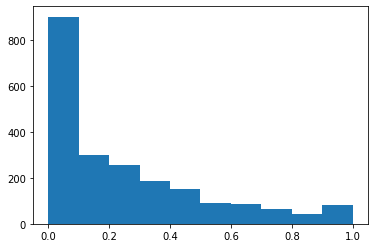

In [5]:
# prob of `1``
plt.hist(new_predsa[:,1])

In [7]:
# new_data[id_vars]
df = new_data[id_vars]
df = df.assign(pred0 = new_predsa[:,0],
               pred1 = new_predsa[:,1])

df.head()

,system_key,yrq,pred0,pred1
0,7489,20203,0.823287,0.176713
1,20634,20203,0.942739,0.057261
2,113936,20203,0.995336,0.004664
3,119434,20203,0.872411,0.127589
4,126647,20203,0.477138,0.522862


In [8]:
outpath = '../data-preds/'
fname = 'pred-proba-' + str(df['yrq'][0]) + '.csv'
print('writing preds to:', outpath + fname)
df.to_csv(outpath + fname, index = False)

writing preds to: ../data-preds/pred-proba-20203.csv
